In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import colour as cl

In [2]:
%matplotlib notebook

In [3]:
unlaminated=cv2.imread(r'/home/cosc/student/oga13/projects/colorchecker/data_raw/not_laminated/-01.png')[:,:,::-1]
laminated=cv2.imread('/home/cosc/student/oga13/projects/colorchecker/data_raw/laminated/-01.png')[:,:,::-1]

<IPython.core.display.Javascript object>


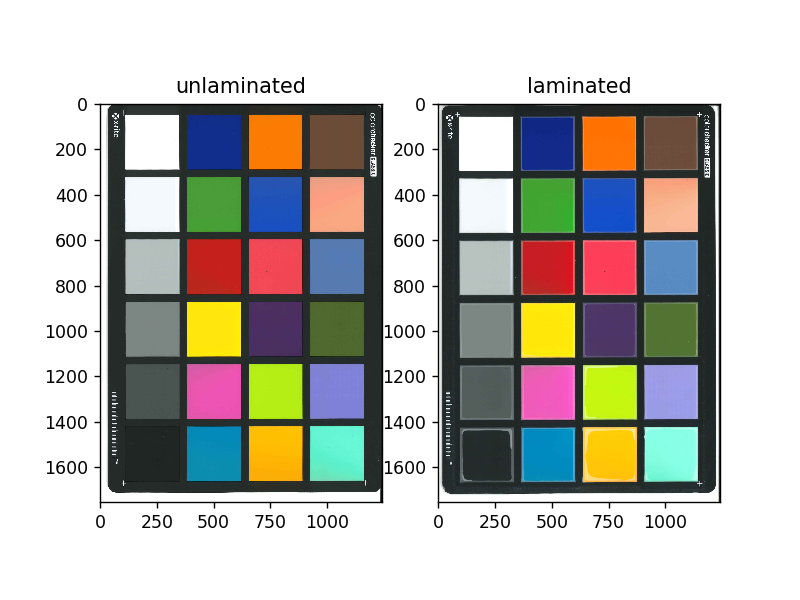

In [4]:
plt.figure()
plt.subplot(1,2,1)
plt.title('unlaminated')
plt.imshow(unlaminated)
plt.subplot(1,2,2)
plt.title('laminated')
plt.imshow(laminated)

In [5]:
cross_unlaminated = np.array([[103.4,42.2],[1169.86,43.56],[102.78,1671],[1167,1669]])
cross_laminated = np.array([  [85,   50],[  1149.7, 50.3],[ 86.3,  1675],[1150,1672]])
cross_unlaminated[:,:2].shape

(4, 2)

In [20]:
def pad1(arr):
    a=np.ones((arr.shape[0],arr.shape[1]+1))
    a[:,:-1]=arr
    return a
#print(pad1(cross_unlaminated))
def parr(arr):
    return np.array2string(arr, formatter={'float_kind':lambda x: "%.2f" % x})

M=np.linalg.lstsq(pad1(cross_unlaminated),pad1(cross_laminated),rcond=None)[0]
print(parr(cross_unlaminated[3]))
(M.T @ pad1(cross_unlaminated).T)[:2,:].T

[1167.00 1669.00]


array([[  84.6899374 ,   49.98751506],
       [1150.01070435,   50.31251078],
       [  86.61071696, 1675.01251128],
       [1149.6886413 , 1671.98746288]])

In [7]:
def convert_points(cross_pts1,cross_pts2,pts):
    M=np.linalg.lstsq(pad1(cross_pts1),pad1(cross_pts2),rcond=None)[0]
    return (M.T @ pad1(pts).T)[:2,:].T

convert_points(cross_unlaminated,cross_laminated,cross_unlaminated)

array([[  84.6899374 ,   49.98751506],
       [1150.01070435,   50.31251078],
       [  86.61071696, 1675.01251128],
       [1149.6886413 , 1671.98746288]])

<IPython.core.display.Javascript object>


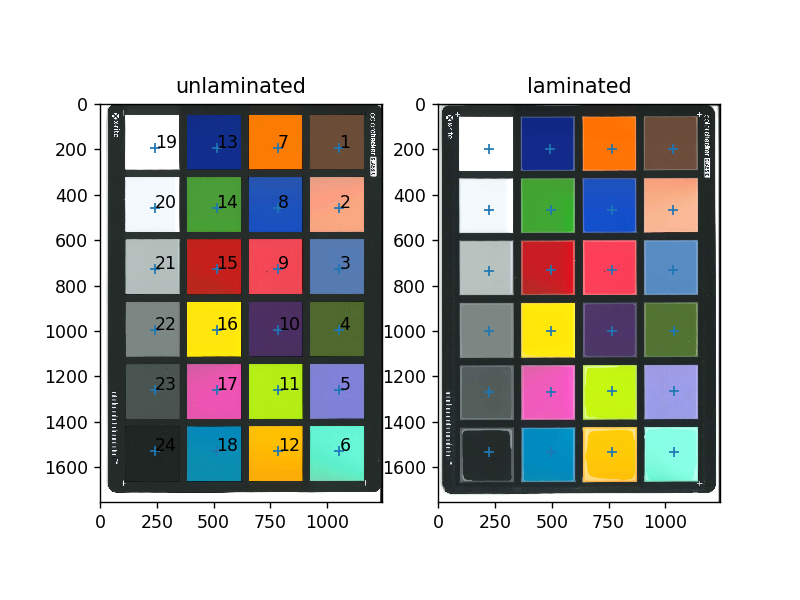

In [8]:
def pick_colors_pts():
    start_point=np.array((242.0,193))
    stepx=(923-111.0)/3.0
    stepy=(1388-52)/5.0
    pts=[]
    for j in range(4):
        for i in range(6):
            pts.append(start_point+(stepx*(3-j),stepy*i))
    return np.array(pts)
pts_unlaminated=pick_colors_pts()
pts_laminated=convert_points(cross_unlaminated,cross_laminated,pts_unlaminated)
plt.figure()
plt.subplot(1,2,1)
plt.title('unlaminated')
plt.imshow(unlaminated)
plt.plot(pts_unlaminated[:,0],pts_unlaminated[:,1],'+')
for i,pt in enumerate(pts_unlaminated):
    plt.text(pt[0],pt[1],'%d'%(i+1))
plt.subplot(1,2,2)
plt.title('laminated')
plt.plot(pts_laminated[:,0],pts_laminated[:,1],'+')
plt.imshow(laminated)


In [21]:
def pick_colors(im,pts,ws=3):
    colors=[]
    for pt in pts:
        val=im[int(pt[1])-ws:int(pt[1])+ws,int(pt[0])-ws:int(pt[0])+ws,:].reshape(-1,3).mean(axis=0)
        colors.append(val)
    return np.array(colors)
#im=unlaminated
#pt=pts_unlaminated[1]
#ws=3
#im[int(pt[1])-ws:int(pt[1])+ws,int(pt[0])-ws:int(pt[0])+ws,:].reshape(-1,3).mean(axis=0)
colunlam=pick_colors(unlaminated,pts_unlaminated)
collam=pick_colors(laminated,pts_laminated)

In [10]:
#CM=cl.first_order_colour_fit(collam,colunlam)
CML=np.transpose(np.linalg.lstsq(collam, colunlam, rcond=None)[0])
def apply_mat(img,c_mat):
    return  (img.reshape((-1,3)) @ c_mat.T).clip(0,255).reshape(img.shape).astype('uint8')


<IPython.core.display.Javascript object>


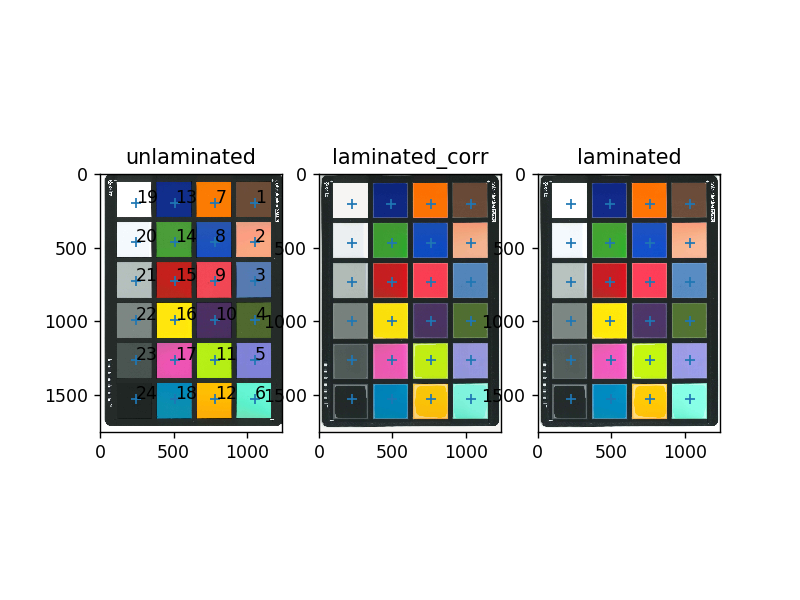

In [11]:
plt.figure()
plt.subplot(1,3,1)
plt.title('unlaminated')
plt.imshow(unlaminated)
plt.plot(pts_unlaminated[:,0],pts_unlaminated[:,1],'+')
for i,pt in enumerate(pts_unlaminated):
    plt.text(pt[0],pt[1],'%d'%(i+1))
plt.subplot(1,3,2)
plt.title('laminated_corr')
plt.plot(pts_laminated[:,0],pts_laminated[:,1],'+')
laminated_corr = apply_mat(laminated,CML)
plt.imshow(laminated_corr)
plt.subplot(1,3,3)
plt.title('laminated')
plt.plot(pts_laminated[:,0],pts_laminated[:,1],'+')
plt.imshow(laminated)

In [12]:
#im1=cv2.imread('/home/cosc/student/oga13/projects/colorchecker/data_raw/samples/20181129_154031.jpg')[:,:,::-1]
im1=cv2.imread('/home/cosc/student/oga13/projects/colorchecker/data_raw/samples/2018-11-29-173913.jpg')[:,:,::-1]
#(h, w) = im1.shape[:2]
#R = cv2.getRotationMatrix2D((w/2,h/2), 90, 1)
im1 = cv2.transpose(cv2.flip( im1, 1 ))
 

<IPython.core.display.Javascript object>


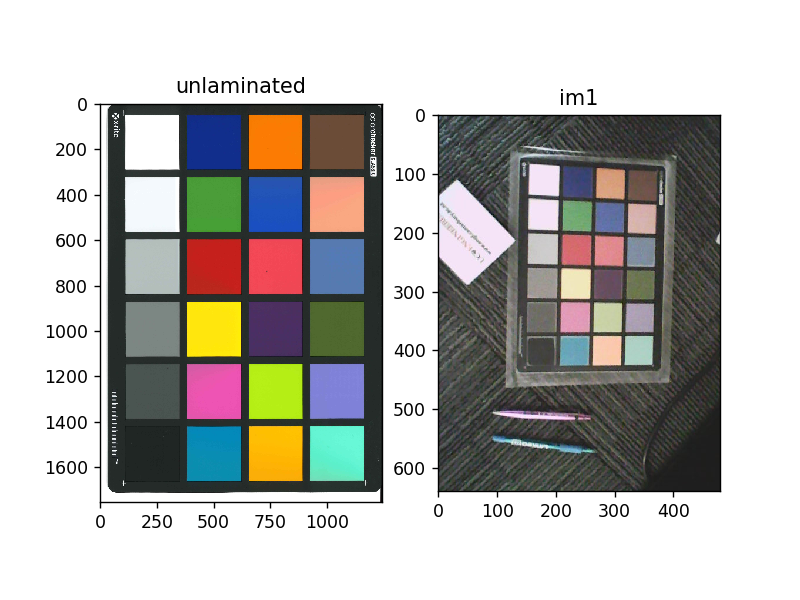

In [13]:
plt.figure()
plt.subplot(1,2,1)
plt.title('unlaminated')
plt.imshow(unlaminated)
plt.subplot(1,2,2)
plt.title('im1')
plt.imshow(im1)

In [14]:
#cross_im1 = np.array([[816,754],[2481.0,805],[758.0,3381],[2501,3360]])
cross_im1 = np.array([[154,80],[373.0,95],[148.0,429],[366,426]])
im1.shape

(640, 480, 3)

<IPython.core.display.Javascript object>


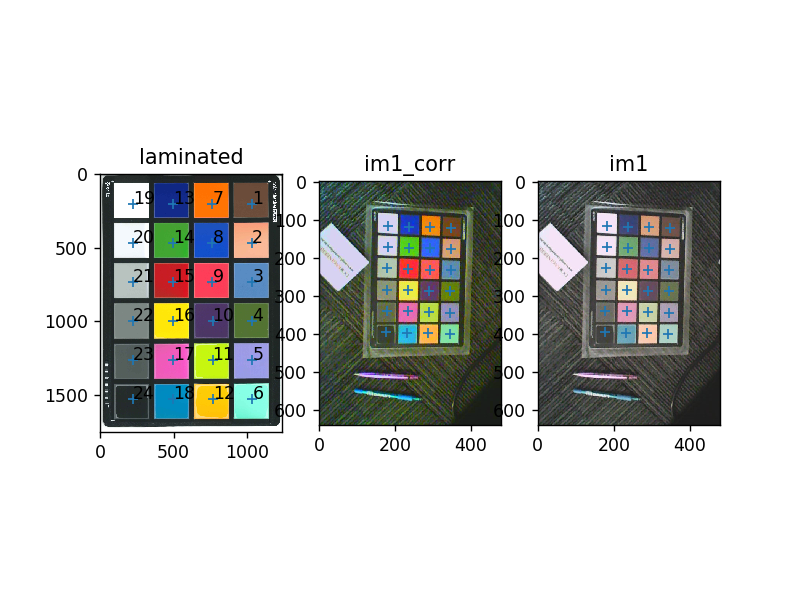

In [15]:
plt.figure()
plt.subplot(1,3,1)
plt.title('laminated')
plt.imshow(laminated)
plt.plot(pts_laminated[:,0],pts_laminated[:,1],'+')
for i,pt in enumerate(pts_laminated):
    plt.text(pt[0],pt[1],'%d'%(i+1))

plt.subplot(1,3,2)
plt.title('im1_corr')
pts_im1=convert_points(cross_laminated,cross_im1,pts_laminated)
plt.plot(pts_im1[:,0],pts_im1[:,1],'+')
collam=pick_colors(laminated,pts_laminated)
coll_im1 = pick_colors(im1,pts_im1)
CM=np.transpose(np.linalg.lstsq(coll_im1, collam, rcond=None)[0])
im1_corr =apply_mat(im1,CM)
plt.imshow(im1_corr)

plt.subplot(1,3,3)
plt.title('im1')
plt.plot(pts_im1[:,0],pts_im1[:,1],'+')
plt.imshow(im1)

In [16]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

<IPython.core.display.Javascript object>


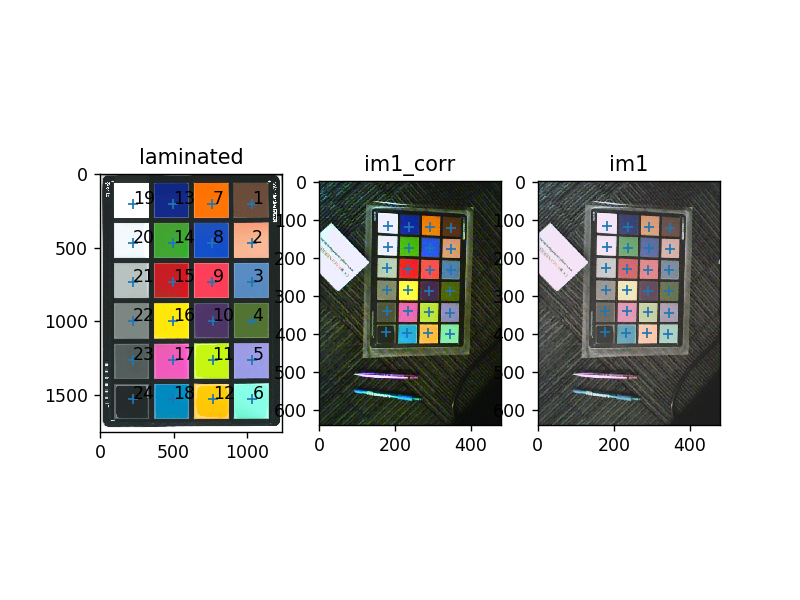

In [17]:
plt.figure()
plt.subplot(1,3,1)
plt.title('laminated')
laminated_g=adjust_gamma(laminated,1.0)
plt.imshow(laminated_g)
plt.plot(pts_laminated[:,0],pts_laminated[:,1],'+')
for i,pt in enumerate(pts_laminated):
    plt.text(pt[0],pt[1],'%d'%(i+1))

plt.subplot(1,3,2)
plt.title('im1_corr')
pts_im1=convert_points(cross_laminated,cross_im1,pts_laminated)
plt.plot(pts_im1[:,0],pts_im1[:,1],'+')
collam=pick_colors(laminated_g,pts_laminated)
im1_g=adjust_gamma(im1,0.7)
coll_im1 = pick_colors(im1_g,pts_im1)
CM=np.transpose(np.linalg.lstsq(coll_im1, collam, rcond=None)[0])
im1_corr =apply_mat(im1_g,CM)
plt.imshow(im1_corr)

plt.subplot(1,3,3)
plt.title('im1')
plt.plot(pts_im1[:,0],pts_im1[:,1],'+')
plt.imshow(im1)